In [3]:
import cv2 as cv
import numpy as np
import math
from matplotlib import pyplot as plt
from pylab import rcParams

In [7]:
rcParams['figure.figsize'] = 7,14

In [2]:
from ImageHandler import *
from ImageProcessing import *
from Processing import *

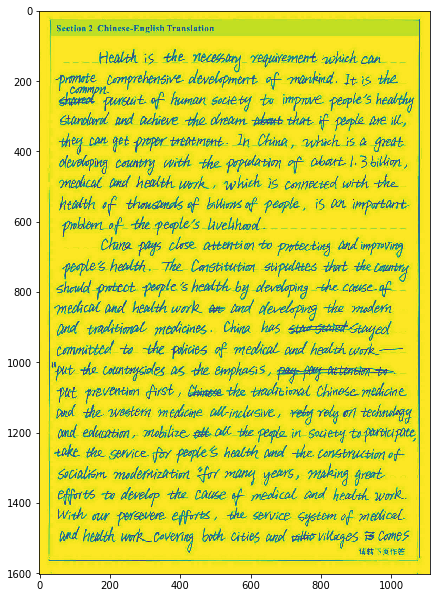

In [32]:
image = loadImage('Test-data/050200074.jpg');
(h, w) = np.shape(image);
plt.imshow(image);

In [66]:
width = int (0.05 * w);
SPR = getSPR(image, width, 5);
print (SPR);

IndexError: list index out of range

In [ ]:
def getdiffSPR(SPR, h):
    
    

In [65]:
def getSPR(image, width, M):
    pp = projectionProfile(image,width);
    wt = getWeights(M)
    delta = getdelta(image, width, pp)
    strips = (int (w/width) + (1 if w%width != 0 else 0));
    SPR = np.ones((strips));
    for i in range(strips):
        SPR[i] = 0;
        for j in range(-M, M + 1):
            SPR[i] += (delta[i + j + M] * wt[j + M] * pp[i + j + M]);
    return SPR;

In [19]:
def projectionProfile(image,width):
    pp = [];
    (h, w) = np.shape(image);
    for i in range(0, int (w/width) + (1 if w%width != 0 else 0)):
        sum = 0;
        for x in range(i*width, (i+1)*width if (i+1)*width < w else w):
            for y in range(0,h):
                if (image[y,x] == 0):
                    sum += 1;
        pp.append(sum);
    return pp;            

In [56]:
def getdelta(image, width, pp):
    th = 0.12;
    delta = [];
    (h, w) = np.shape(image);
    for i in range(len(pp)):
        sum = 0;
        total = (width if (i+1)*width <= w else (w - i*width)) * h;
        d = pp[i] / total
        if d > th:   
            delta.append(1);
        else:
            delta.append(0);
    return delta

In [61]:
def getWeights(m):
    denom = 0;
    w = [];
    for i in range(-m,m+1):
        denom += math.exp(-3 * abs(i)/(m+1));
    for i in range(-m,m+1):
        w.append(math.exp(-3 * abs(i)/(m+1)) / denom);
    return w;

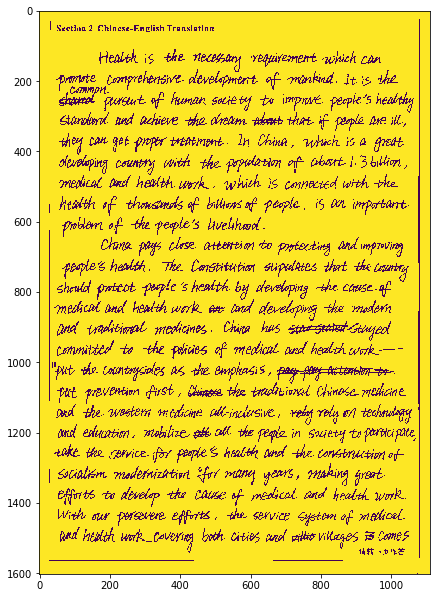

In [34]:
plt.imshow(image)